<a href="https://colab.research.google.com/github/maxkleiner/Bayes_theorem/blob/master/ARIMA_Predictor21_Cross_Over_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to find the order of (p,d,q) in ARIMA timeseries model
A time series is a sequence where a metric is recorded over regular time intervals.
Inspired by 
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


---



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


        0   1   2   3   4   5   6   7   8   9
value  88  84  85  85  84  85  83  85  88  89
ADF Statistic: -2.464240
p-value: 0.124419


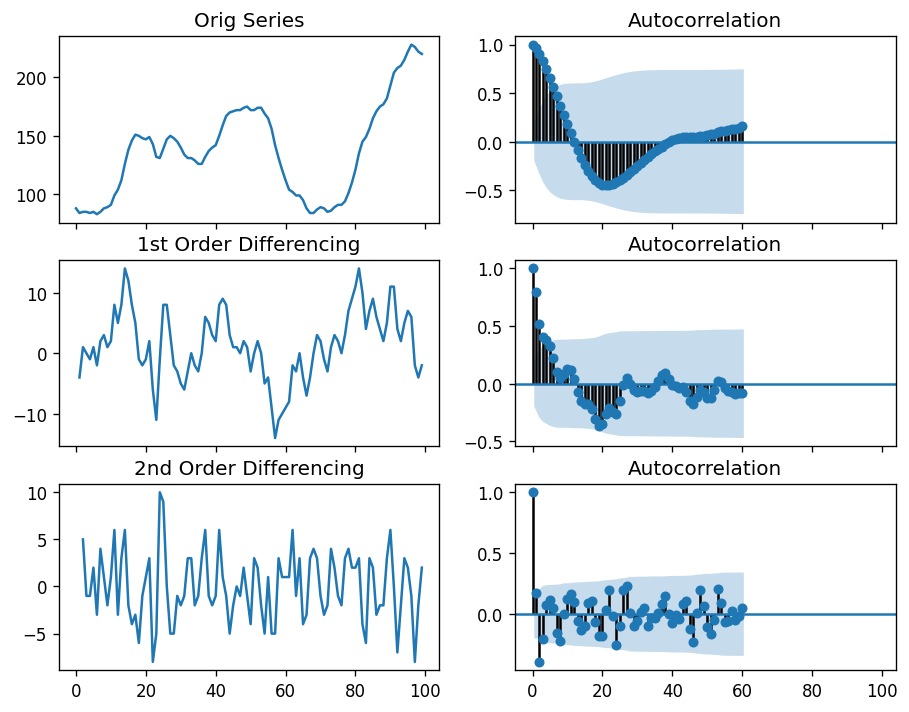

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


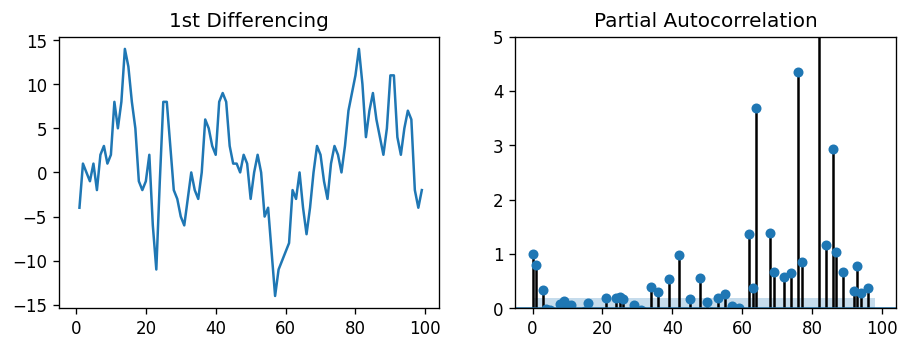

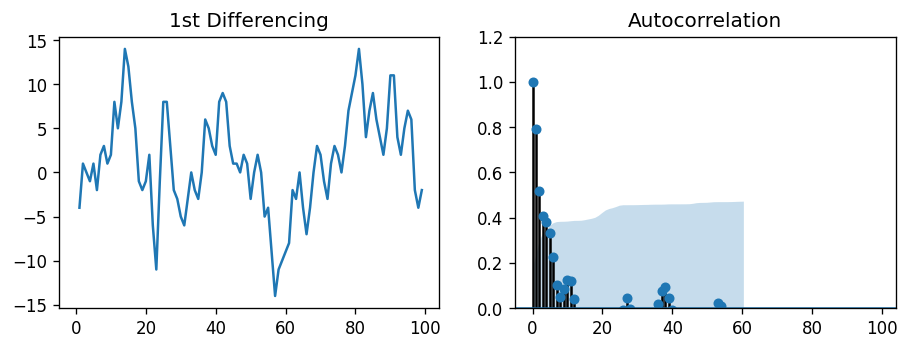

first fit                               ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Tue, 19 Oct 2021   AIC                            517.579
Time:                        16:42:49   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.387      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.015       0.131       1.139
ma.L1.D.value     0.5287     

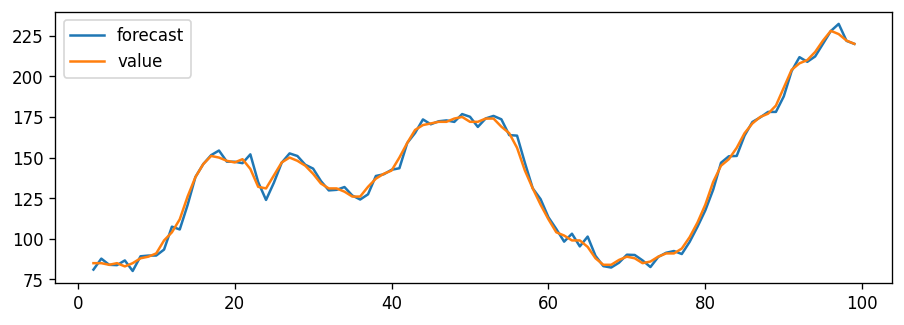

second fit                               ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   78
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -201.757
Method:                       css-mle   S.D. of innovations              3.203
Date:                Tue, 19 Oct 2021   AIC                            417.515
Time:                        16:42:49   BIC                            434.012
Sample:                             2   HQIC                           424.119
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1142      0.244      0.468      0.641      -0.364       0.593
ar.L1.D2.value    -0.2673      0.368     -0.726      0.470      -0.989       0.455
ar.L2.D2.value    -0.035

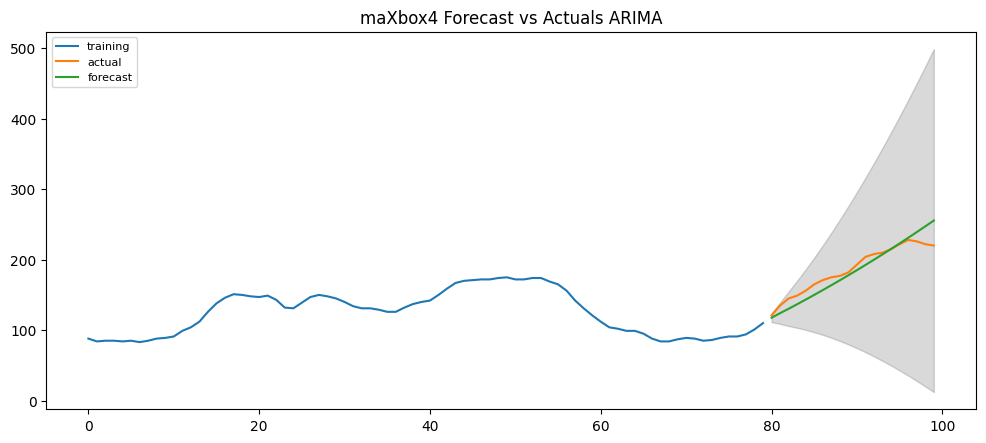

{'mape': 0.058370189636089274, 'me': -2.769703791401935, 'mae': 10.625625202293012, 'mpe': -0.022973973061524277, 'rmse': 13.431493842534438, 'acf1': 0.7062545291409181, 'corr': 0.9690321780597789, 'minmax': 0.05649166741138667}
Around 5% MAPE implies a model is about 95% accurate in predicting next 20 observations.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
#sign:max: MAXBOX8: 03/02/2021 18:34:41 
# optimal moving average OMA for market index signals ARIMA study- Max Kleiner
# v2 shell argument forecast days - 4 lines compare - ^GDAXI for DAX
# pip install pandas-datareader
# C:\maXbox\mX46210\DataScience\princeton\AB_NYC_2019.csv   AB_NYC_2019.csv
#https://medium.com/abzuai/the-qlattice-a-new-machine-learning-model-you-didnt-know-you-needed-c2e037878cd
#https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb     41
#https://www.kaggle.com/duygut/airbnb-nyc-price-prediction
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
 
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy as np, pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
wwwus = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

import pandas as pd

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


#wwwus = pd.read_csv(r'C:\maXbox\mX46210\DataScience\princeton\1022dataset.txt', \
#                                                            names=['value'], header=0)

print(wwwus.head(10).T) #Transposed for column overview

#1. How to find the order of differencing (d) in ARIMA model
result = adfuller(wwwus.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#"""
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(wwwus.value); axes[0, 0].set_title('Orig Series')
plot_acf(wwwus.value, ax=axes[0, 1], lags=60)

# 1st Differencing
axes[1, 0].plot(wwwus.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(wwwus.value.diff().dropna(), ax=axes[1, 1], lags=60)

# 2nd Differencing
axes[2, 0].plot(wwwus.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(wwwus.value.diff().diff().dropna(), ax=axes[2, 1], lags=60)

plt.show()

#2. How to find the order of the AR term (p)
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(wwwus.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(wwwus.value.diff().dropna(), ax=axes[1], lags=100)

plt.show()

#3. How to find the order of the MA term (q)
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(wwwus.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(wwwus.value.diff().dropna(), ax=axes[1] , lags=60)

plt.show()
#"""

#4. How to build the ARIMA Model
model = ARIMA(wwwus.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print('first fit ',model_fit.summary())

"""
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
"""

#5. Plot Predict Actual vs Fitted
# When you set dynamic=False in-sample lagged values are used for prediction.
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
model_fit.plot_predict(dynamic=False)
plt.show()

#That is, the model gets trained up until the previous value to make next prediction. This can make a fitted forecast and actuals look artificially good.

# Now Create Training and Test
train = wwwus.value[:80]
test = wwwus.value[80:]

#model = ARIMA(train, order=(3, 2, 1))  
model = ARIMA(train, order=(2, 2, 3))  
fitted = model.fit(disp=-1)
print('second fit ',fitted.summary())  

# Forecast
fc,se,conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series = pd.Series(conf[:,1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                                            color='k', alpha=.15)
plt.title('maXbox4 Forecast vs Actuals ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(forecast_accuracy(fc, test.values))

print('Around 5% MAPE implies a model is about 95% accurate in predicting next 20 observations.')


# **Step by Step Code Order**



# #1. How to find the order of differencing (d) in ARIMA model
* p is the order of the AR term

* q is the order of the MA term

* d is the number of differencing required to make the time series stationary as I term


In [ ]:
#1. How to find the order of differencing (d) in ARIMA model
result = adfuller(wwwus.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


A p-value less than 0.05 (typically ≤ 0.05) is statistically **significant**. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null hypo is correct (and the results are by random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis (there is  correlation).

Our timeserie is not significant, why?

Example:
ADF Statistic: -2.464240
p-value: 0.124419
0-Hypothesis non stationary
0.12 > 0.05 -> not significant, therefore we can not reject the 0-hypthesis so our time series is **non stationary** and we had to differencing it to make it stationary.
The purpose of differencing it is to make the time series stationary. 

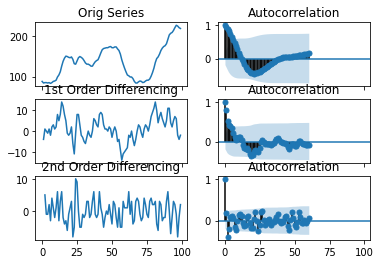

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(wwwus.value); axes[0, 0].set_title('Orig Series')
plot_acf(wwwus.value, ax=axes[0, 1], lags=60)

# 1st Differencing
axes[1, 0].plot(wwwus.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(wwwus.value.diff().dropna(), ax=axes[1, 1], lags=60)

# 2nd Differencing
axes[2, 0].plot(wwwus.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(wwwus.value.diff().diff().dropna(), ax=axes[2, 1], lags=60)

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing. But we use for the beginning 1 order as a conservative part. Let me explain that:

D>2 is not allowed in statsmodels.tsa.arima_model!

Maybe d>2 is not allowed means our best bet is to start simple, check if integrating once grants stationarity. If so, we can fit a simple ARIMA model and examine the ACF of the residual values to get a better feel about what orders of differencing to use. Also a drawback, if we integrate more than two times (d>2), we lose n observations, one for each integration. And one of the most common errors in ARIMA modeling is to "overdifference" the series and end up adding extra AR or MA terms to undo the forecast damage, so the author (I assume) decides to raise this exception.

# #2. How to find the order of the AR term (p)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


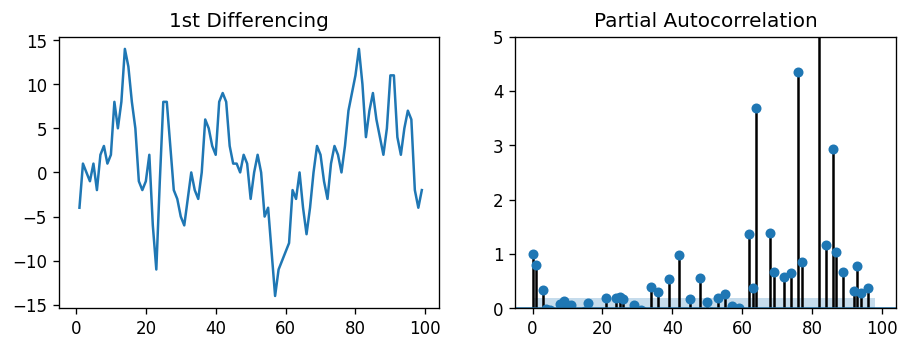

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(wwwus.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(wwwus.value.diff().dropna(), ax=axes[1], lags=100)

plt.show()

# #3. How to find the order of the MA term (q)

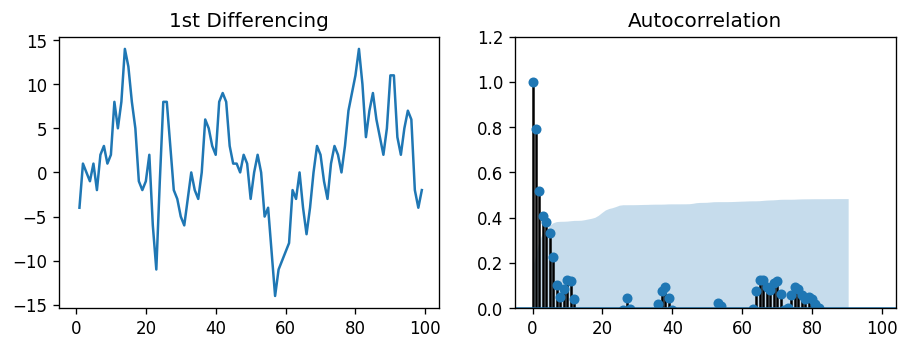

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(wwwus.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(wwwus.value.diff().dropna(), ax=axes[1] , lags=90)

plt.show()

#4. How to build the ARIMA Model

In [ ]:
model = ARIMA(wwwus.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print('first fit ',model_fit.summary())

first fit                               ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Tue, 19 Oct 2021   AIC                            517.579
Time:                        16:48:29   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.387      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.015       0.131       1.139
ma.L1.D.value     0.5287     

Notice here the coefficient of the MA2 term is close to zero (-0.0010 ) and the P-Value in ‘P>|z|’ column is highly insignificant (0.9). It should ideally be less than 0.05 for the respective X to be significant << 0.05.

# 5. Plot residual errors
Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

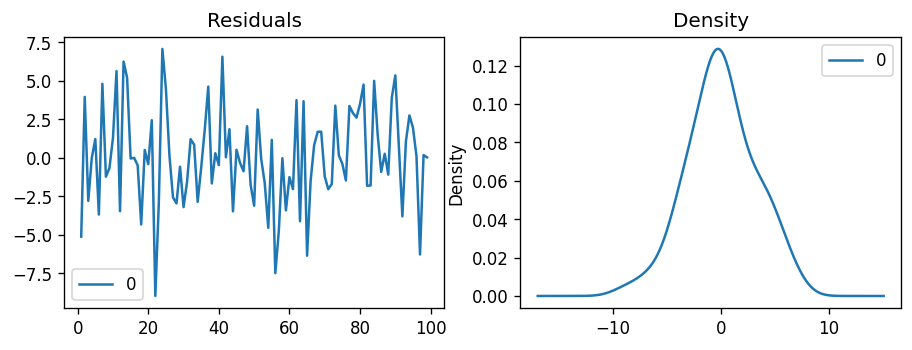

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#6. Plot Predict Actual vs Fitted
When you set dynamic=False in-sample lagged values are used for prediction.
That is, the model gets trained up until the previous values to make next prediction. This can make a fitted forecast and actuals look artificially good.

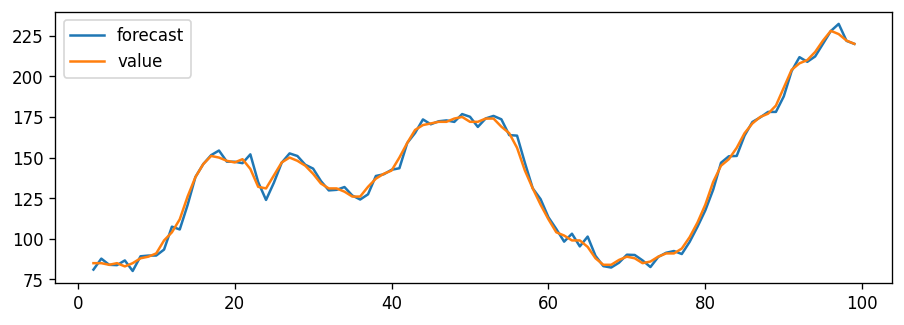

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
model_fit.plot_predict(dynamic=False)
plt.show()

# 7. Now Create Training and Test Validation
We can see that ARIMA is adequately forecasting the seasonal pattern in the series. In terms of the model performance, the RMSE (root mean squared error) and MFE (mean forecast error) and also best in terms of the lowest BIC .

second fit                               ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   78
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -201.757
Method:                       css-mle   S.D. of innovations              3.203
Date:                Tue, 19 Oct 2021   AIC                            417.515
Time:                        16:48:53   BIC                            434.012
Sample:                             2   HQIC                           424.119
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1142      0.244      0.468      0.641      -0.364       0.593
ar.L1.D2.value    -0.2673      0.368     -0.726      0.470      -0.989       0.455
ar.L2.D2.value    -0.035

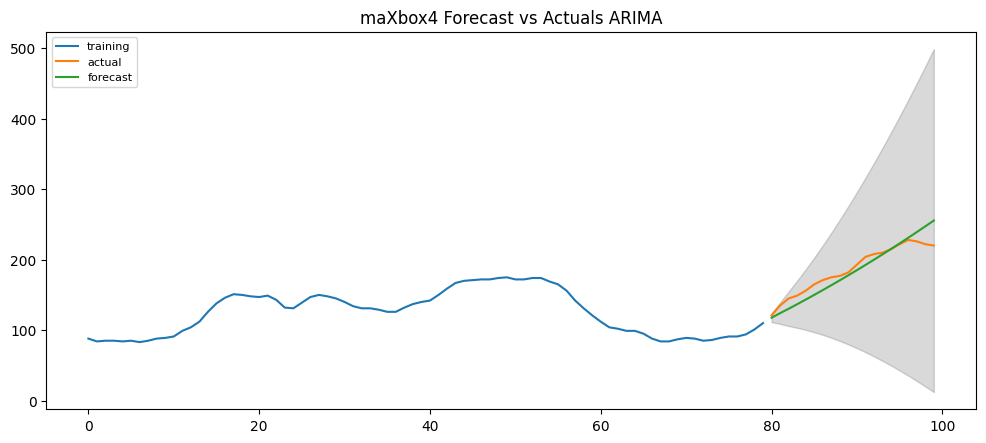

In [ ]:
train = wwwus.value[:80]
test = wwwus.value[80:]

#model = ARIMA(train, order=(3, 2, 1))  
model = ARIMA(train, order=(2, 2, 3))  
fitted = model.fit(disp=-1)
print('second fit ',fitted.summary())  

# Forecast
fc,se,conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series = pd.Series(conf[:,1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                                            color='k', alpha=.15)
plt.title('maXbox4 Forecast vs Actuals ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# 8. Some scores and performance 
The **20** observations depends on the train/test set fc,se,conf = fitted.forecast(**20**, alpha=0.05)  # 95% **conf**

In [ ]:
print(forecast_accuracy(fc, test.values))

print('Around 5% MAPE implies a model is about 95% accurate in predicting next 20 observations.')

{'mape': 0.058370189636089274, 'me': -2.769703791401935, 'mae': 10.625625202293012, 'mpe': -0.022973973061524277, 'rmse': 13.431493842534438, 'acf1': 0.7062545291409181, 'corr': 0.9690321780597789, 'minmax': 0.05649166741138667}
Around 5% MAPE implies a model is about 95% accurate in predicting next 20 observations.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Around 5% MAPE implies a model is about 95% accurate in predicting next 20 observations.

Define a ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1) and is non stationary

Alternate Hypothesis: The series has no unit root.

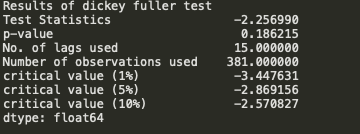


We see that the p-value 0.18 is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary and the null hypothesis is right.

To get a stationary series, we need to eliminate the trend and seasonality from the series. Remember that for time series forecasting, a series needs to be stationary. The series should have a constant mean, variance, and covariance. We need to take care of the seasonality in the series. One such method for this task is differencing. Differencing is a method of transforming a time series dataset. In order to perform a time series analysis, we may need to separate systematic seasonality and trend from our series (and one non-systematic component called noise). The resultant series will become stationary through this process.

# Check a Cross-Over MA

Aus diesem Anlass soll anhand eines einfachen Python-Skripts (siehe Abbildung 27) untersucht werden, wie hoch die Gewinnsteigerung mit einer simplen Kaufen- und Halten Strategie ausfällt, im Vergleich zu einer Cross-Over-Moving-Average Strategie, welche zum einem durch Kaufaktionen bei positiven Trends versucht Gewinne zu erzielen, als auch durch Leerverkäufe bei negativen Trends Gewinne zu erzielen, sowie einer kombinierten Strategie für positive und negative Trends (mit Käufen und Leerverkäufen).

On this occasion, a simple Python script (see Figure 27) should be used to examine how high the increase in profit is with a simple buy and hold strategy, compared to a cross-over moving average strategy, which on the one hand is through buying actions tries to make a profit with positive trends, as well as profit by short selling with negative trends, as well as a combined strategy for positive and negative trends (with buying and short selling). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now we need the data to dataframe

In [3]:
!ls -l
df_all = pd.read_excel(r'./sample_data/AMZN.xlsx')

total 4
drwxr-xr-x 1 root root 4096 Oct 22 14:29 sample_data


In [5]:
df_amzn = pd.DataFrame()
df_amzn['Adj_Close'] = df_all['AMZN']
df_amzn['Daily_Return'] = df_amzn['Adj_Close'].diff().shift(-1)

In [6]:
df_amzn['moving_avg_8'] = df_amzn['Adj_Close'].rolling(8).mean().to_frame()
df_amzn['moving_avg_20'] = df_amzn['Adj_Close'].rolling(20).mean().to_frame()
df_amzn['signal_buy_8_20'] = np.where(df_amzn['moving_avg_8'] >= df_amzn['moving_avg_20'], 1, 0)
df_amzn['signal_sell_8_20'] = np.where(df_amzn['moving_avg_8'] < df_amzn['moving_avg_20'], -1, 0)
df_amzn['signal_buy_8_20_profit'] = df_amzn['Daily_Return'] * df_amzn['signal_buy_8_20']
df_amzn['signal_sell_8_20_profit'] = df_amzn['Daily_Return'] * df_amzn['signal_sell_8_20']
print('{}{}{}{}{}{}{}{}'.format('buy: ', df_amzn['signal_buy_8_20_profit'].sum(),
      '\nsell: ', df_amzn['signal_sell_8_20_profit'].sum(),
      '\nCombined: ', df_amzn['signal_buy_8_20_profit'].sum() + df_amzn['signal_sell_8_20_profit'].sum(),
      '\nhold: ', df_amzn['Daily_Return'].sum()))

buy: 1787.5375189781175
sell: -1414.8850884437575
Combined: 372.65243053436006
hold: 3187.985107421875
